# Notebook to plot logFC before and after Cellbender

**Created by :** Srivalli Kolla

**Created on :** 17 August, 2024

**Modified on :** 17 September, 2024

**Institute of SystemsImmunology, University of Würuburg**

Env : scanpy(Python 3.12.4)

# Importing packages

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scanpy as sc

In [4]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 300, color_map = 'RdPu', dpi_save = 300, vector_friendly = True, format = 'svg')

-----
anndata     0.10.8
scanpy      1.10.2
-----
PIL                 10.3.0
asttokens           NA
attr                23.2.0
cffi                1.16.0
colorama            0.4.6
comm                0.2.2
cycler              0.12.1
cython_runtime      NA
dateutil            2.9.0.post0
debugpy             1.8.2
decorator           5.1.1
defusedxml          0.7.1
distutils           3.12.4
django              5.0.6
executing           2.0.1
h5py                3.11.0
igraph              0.11.5
ipykernel           6.29.5
ipython_genutils    0.2.0
ipywidgets          8.1.3
jedi                0.19.1
joblib              1.4.2
kiwisolver          1.4.5
legacy_api_wrap     NA
leidenalg           0.10.2
llvmlite            0.43.0
louvain             0.8.2
matplotlib          3.8.4
mpl_toolkits        NA
natsort             8.4.0
numba               0.60.0
numexpr             2.10.1
numpy               1.26.4
packaging           24.1
pandas              2.2.2
parso               0.8.4
patsy  

# Importing data - logFC

1. Import logFC values
2. Name the order of models

In [5]:
log_data = {
    'Model' : ['0.01 Ambient', '0.03 Ambient', '0.05 Ambient', '0.07 Ambient', '0.1 Ambient',
          '0.01 Full', '0.03 Full', '0.05 Full', '0.07 Full', '0.1 Full'],
    'Myl2': [-1.15, -1.19, -1.24, -1.29, -1.35, -1.17, -1.21, -1.26, -1.31, -1.38],
    'Mb': [-1.08, -1.08, -1.10, -1.13, -1.18, -1.10, -1.10, -1.12, -1.15, -1.20],
    'Myh6': [-1.05, -1.08, -1.12, -1.16, -1.24, -1.07, -1.09, -1.13, -1.17, -1.26],
    'Tnni3': [-0.96, -0.93, -0.92, -0.91, -0.91, -0.97, -0.94, -0.92, -0.92, -0.93],
    'Camk1d': [-0.95, -1.03, -1.12, -1.21, -1.34, -0.95, -1.03, -1.13, -1.22, -1.35],
    'Ttn': [-0.93, -1.06, -1.30, -1.73, -2.03, -0.94, -1.08, -1.33, -1.74, -2.09],
    'AY036118': [-0.76, -0.77, -0.80, -0.84, -0.90, -0.77, -0.79, -0.81, -0.85, -0.91],
    'Gm42418': [-0.73, -0.82, -0.92, -1.01, -1.11, -0.71, -0.81, -0.90, -0.99, -1.10],
    'Tnnt2': [-0.68, -0.63, -0.58, -0.56, -0.55, -0.70, -0.64, -0.59, -0.57, -0.56],
    'Atp2a2': [-0.67, -0.73, -0.81, -0.89, -0.98, -0.69, -0.76, -0.84, -0.91, -1.00],
    'Ryr2': [-0.53, -0.64, -0.84, -1.14, -1.50, -0.56, -0.68, -0.87, -1.15, -1.51],
    'Cox4i1': [-0.53, -0.46, -0.41, -0.36, -0.32, -0.55, -0.48, -0.43, -0.38, -0.34],
    'Cox6c': [-0.51, -0.44, -0.38, -0.33, -0.29, -0.53, -0.46, -0.40, -0.36, -0.32],
    'Fth1': [-0.44, -0.38, -0.33, -0.29, -0.26, -0.45, -0.39, -0.34, -0.31, -0.28],
    'Atp5g1': [-0.44, -0.34, -0.24, -0.16, -0.08, -0.45, -0.35, -0.25, -0.17, -0.09],
    'Pln': [-0.41, -0.34, -0.30, -0.28, -0.25, -0.42, -0.35, -0.31, -0.29, -0.26],
    'Tnnc1': [-0.38, -0.26, -0.15, -0.06, 0.04, -0.38, -0.27, -0.15, -0.06, 0.03],
    'Cryab': [-0.33, -0.22, -0.13, -0.04, 0.04, -0.34, -0.23, -0.13, -0.05, 0.03],
    'Cmss1': [-0.30, -0.34, -0.40, -0.47, -0.56, -0.30, -0.35, -0.41, -0.48, -0.58],
    'Fhl2': [-0.28, -0.24, -0.22, -0.25, -0.33, -0.30, -0.27, -0.25, -0.26, -0.32],
    'Hbb-bs': [-0.27, -0.32, -0.39, -0.47, -0.59, -0.26, -0.31, -0.39, -0.46, -0.58],
    'Gsn': [-0.15, -0.26, -0.40, -0.51, -0.67, -0.16, -0.28, -0.41, -0.52, -0.69],
    'Malat1': [-0.01, -0.15, -0.40, -0.91, -1.11, -0.01, -0.16, -0.44, -0.89, -1.15],
    'Cacna1c': [0.06, -0.15, -0.46, -0.62, -0.69, 0.04, -0.20, -0.47, -0.63, -0.69],
    'Slc8a1': [0.32, 0.07, -0.29, -0.53, -0.72, 0.29, 0.05, -0.30, -0.56, -0.74],
    'Zbtb20': [0.84, 0.83, 0.69, 0.55, 0.52, 0.83, 0.83, 0.68, 0.55, 0.52]
}

In [6]:
logfc_df = pd.DataFrame(log_data).set_index('Model')
logfc_df_transpose = logfc_df.T

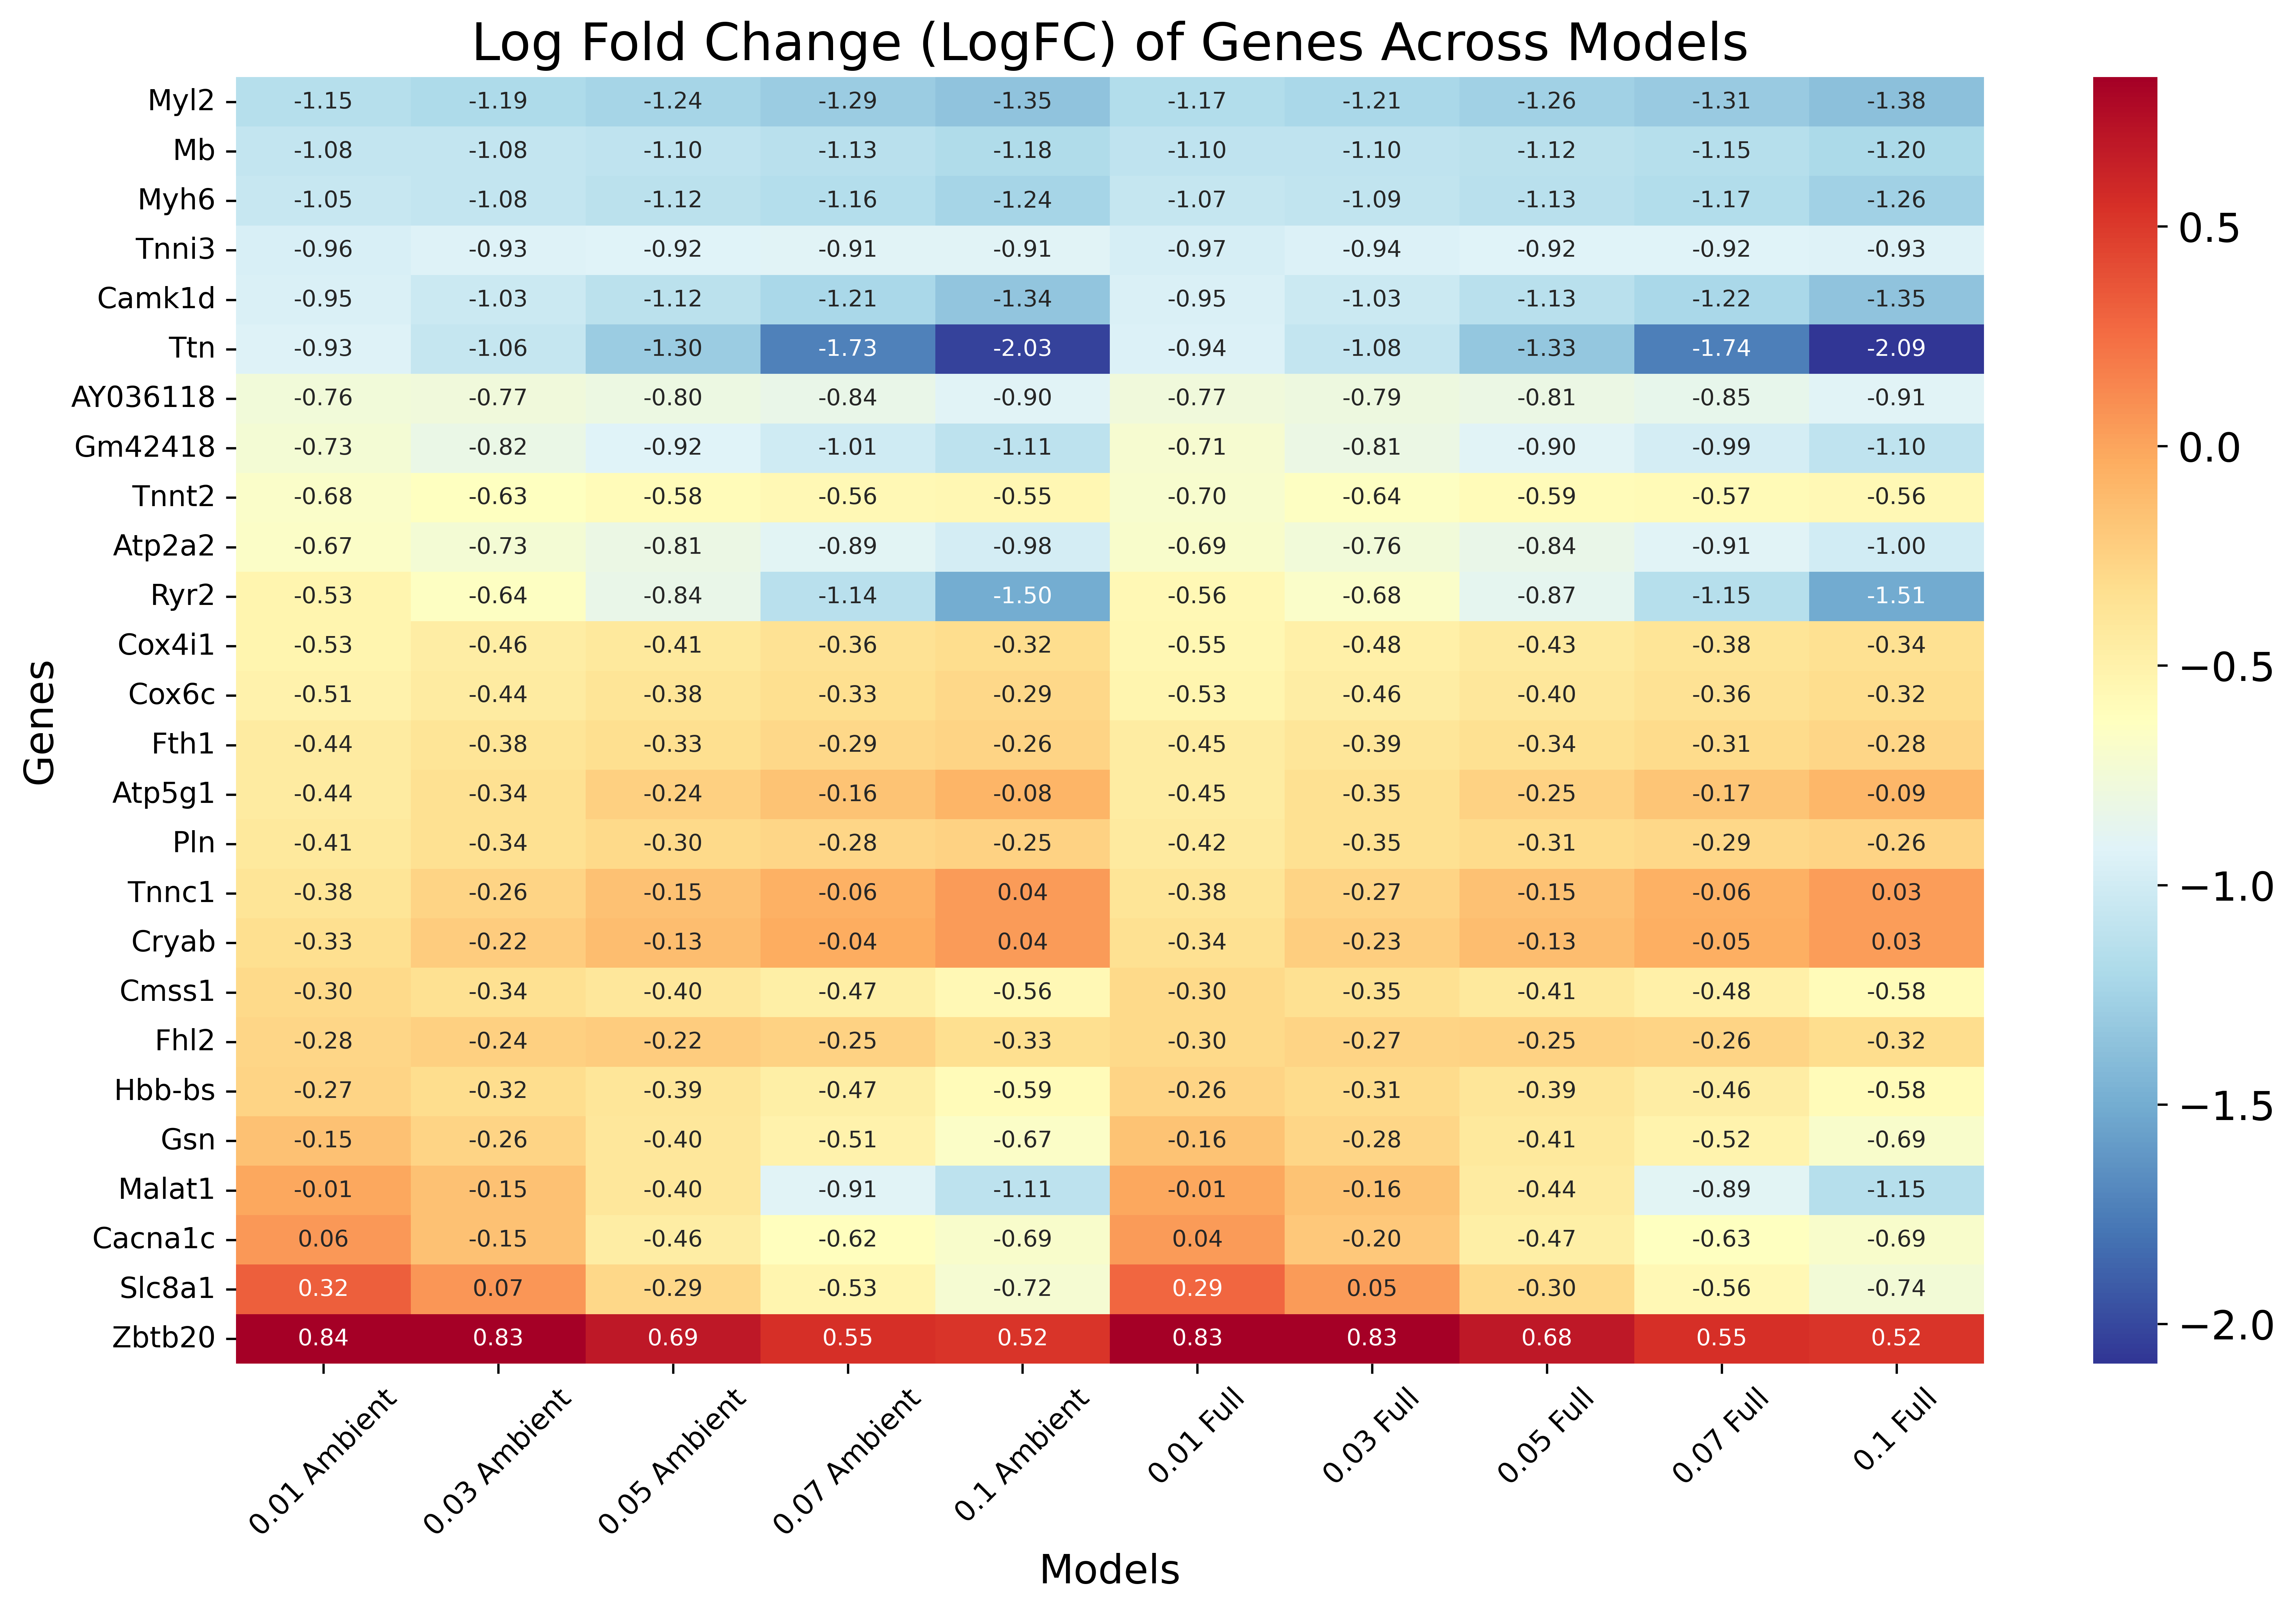

In [7]:
plt.figure(figsize=(12, 8))
ax = sns.heatmap(logfc_df_transpose, annot=True, cmap='RdYlBu_r', fmt='.2f', annot_kws={"size": 8}, linewidths=0, linecolor='none')  
ax.grid(False)
plt.title('Log Fold Change (LogFC) of Genes Across Models', fontsize = 18)
plt.xlabel('Models')
plt.ylabel('Genes')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.tight_layout()
plt.show()

# Importing data - Mean Expression valueas

In [8]:
mean_data = {
    'Model': ['Before Cellbender', '0.01 Ambient', '0.03 Ambient', '0.05 Ambient', '0.07 Ambient', '0.1 Ambient', '0.01 Full', '0.03 Full', '0.05 Full', '0.07 Full', '0.1 Full'],
    'Myl2': [8.47, 7.32, 7.28, 6.08, 5.99, 4.73, 4.82, 3.52, 3.56, 2.21, 2.18],
    'Mb': [7.88, 6.8, 6.8, 5.7, 5.67, 4.52, 4.57, 3.42, 3.45, 2.27, 2.25],
    'Myh6': [7.71, 6.66, 6.63, 5.54, 5.47, 4.3, 4.4, 3.21, 3.27, 2.04, 2.01],
    'Tnni3': [7.31, 6.35, 6.38, 5.43, 5.47, 4.52, 4.5, 3.58, 3.58, 2.66, 2.65],
    'Camk1d': [8.74, 7.79, 7.71, 6.67, 6.5, 5.33, 5.55, 4.3, 4.42, 3.08, 3.07],
    'Ttn': [6.17, 5.24, 5.11, 3.94, 3.38, 1.91, 2.44, 0.83, 1.11, -0.91, -0.98],
    'AY036118': [7.87, 7.11, 7.1, 6.31, 6.26, 5.41, 5.49, 4.62, 4.68, 3.77, 3.77],
    'Gm42418': [10.89, 10.16, 10.07, 9.24, 9.06, 8.13, 8.35, 7.32, 7.45, 6.33, 6.35],
    'Tnnt2': [6.82, 6.14, 6.19, 5.56, 5.63, 5.01, 4.93, 4.37, 4.34, 3.8, 3.78],
    'Atp2a2': [6.64, 5.97, 5.91, 5.16, 5.02, 4.18, 4.33, 3.42, 3.49, 2.51, 2.49],
    'Ryr2': [3.13, 2.6, 2.49, 1.76, 1.35, 0.26, 0.79, -0.42, -0.08, -1.57, -1.59],
    'Cox4i1': [6.04, 5.51, 5.58, 5.1, 5.22, 4.78, 4.67, 4.3, 4.24, 3.92, 3.9],
    'Cox6c': [5.96, 5.45, 5.52, 5.07, 5.19, 4.78, 4.66, 4.32, 4.26, 3.96, 3.94],
    'Fth1': [5.35, 4.91, 4.97, 4.58, 4.68, 4.32, 4.23, 3.93, 3.89, 3.62, 3.61],
    'Atp5g1': [5, 4.56, 4.66, 4.32, 4.5, 4.24, 4.05, 3.89, 3.8, 3.72, 3.71],
    'Pln': [6.12, 5.71, 5.78, 5.41, 5.5, 5.16, 5.08, 4.81, 4.77, 4.52, 4.51],
    'Tnnc1': [5.02, 4.64, 4.76, 4.49, 4.7, 4.53, 4.32, 4.26, 4.17, 4.2, 4.2],
    'Cryab': [4.81, 4.48, 4.59, 4.35, 4.55, 4.39, 4.21, 4.16, 4.08, 4.11, 4.11],
    'Cmss1': [7.6, 7.3, 7.26, 6.9, 6.79, 6.34, 6.49, 5.99, 6.08, 5.51, 5.5],
    'Fhl2': [3.62, 3.34, 3.38, 3.12, 3.13, 2.79, 2.83, 2.52, 2.58, 2.26, 2.26],
    'Hbb-bs': [4.94, 4.67, 4.62, 4.28, 4.15, 3.69, 3.89, 3.38, 3.5, 2.92, 2.92],
    'Gsn': [4.46, 4.31, 4.2, 3.91, 3.69, 3.24, 3.53, 2.96, 3.12, 2.44, 2.43],
    'Malat1': [8.98, 8.97, 8.83, 8.57, 7.92, 7.46, 7.91, 7.3, 7.47, 6.41, 6.32],
    'Cacna1c': [1.64, 1.7, 1.49, 1.24, 0.87, 0.55, 0.91, 0.35, 0.44, -0.28, -0.25],
    'Slc8a1': [2.42, 2.74, 2.49, 2.45, 1.96, 1.73, 2.25, 1.78, 1.95, 1.22, 1.21],
    'Zbtb20': [3, 3.84, 3.83, 4.53, 4.38, 5.05, 5.21, 5.88, 5.89, 6.43, 6.41]
}

In [9]:
mean_df = pd.DataFrame(mean_data).set_index('Model')
mean_df_transpose = mean_df.T

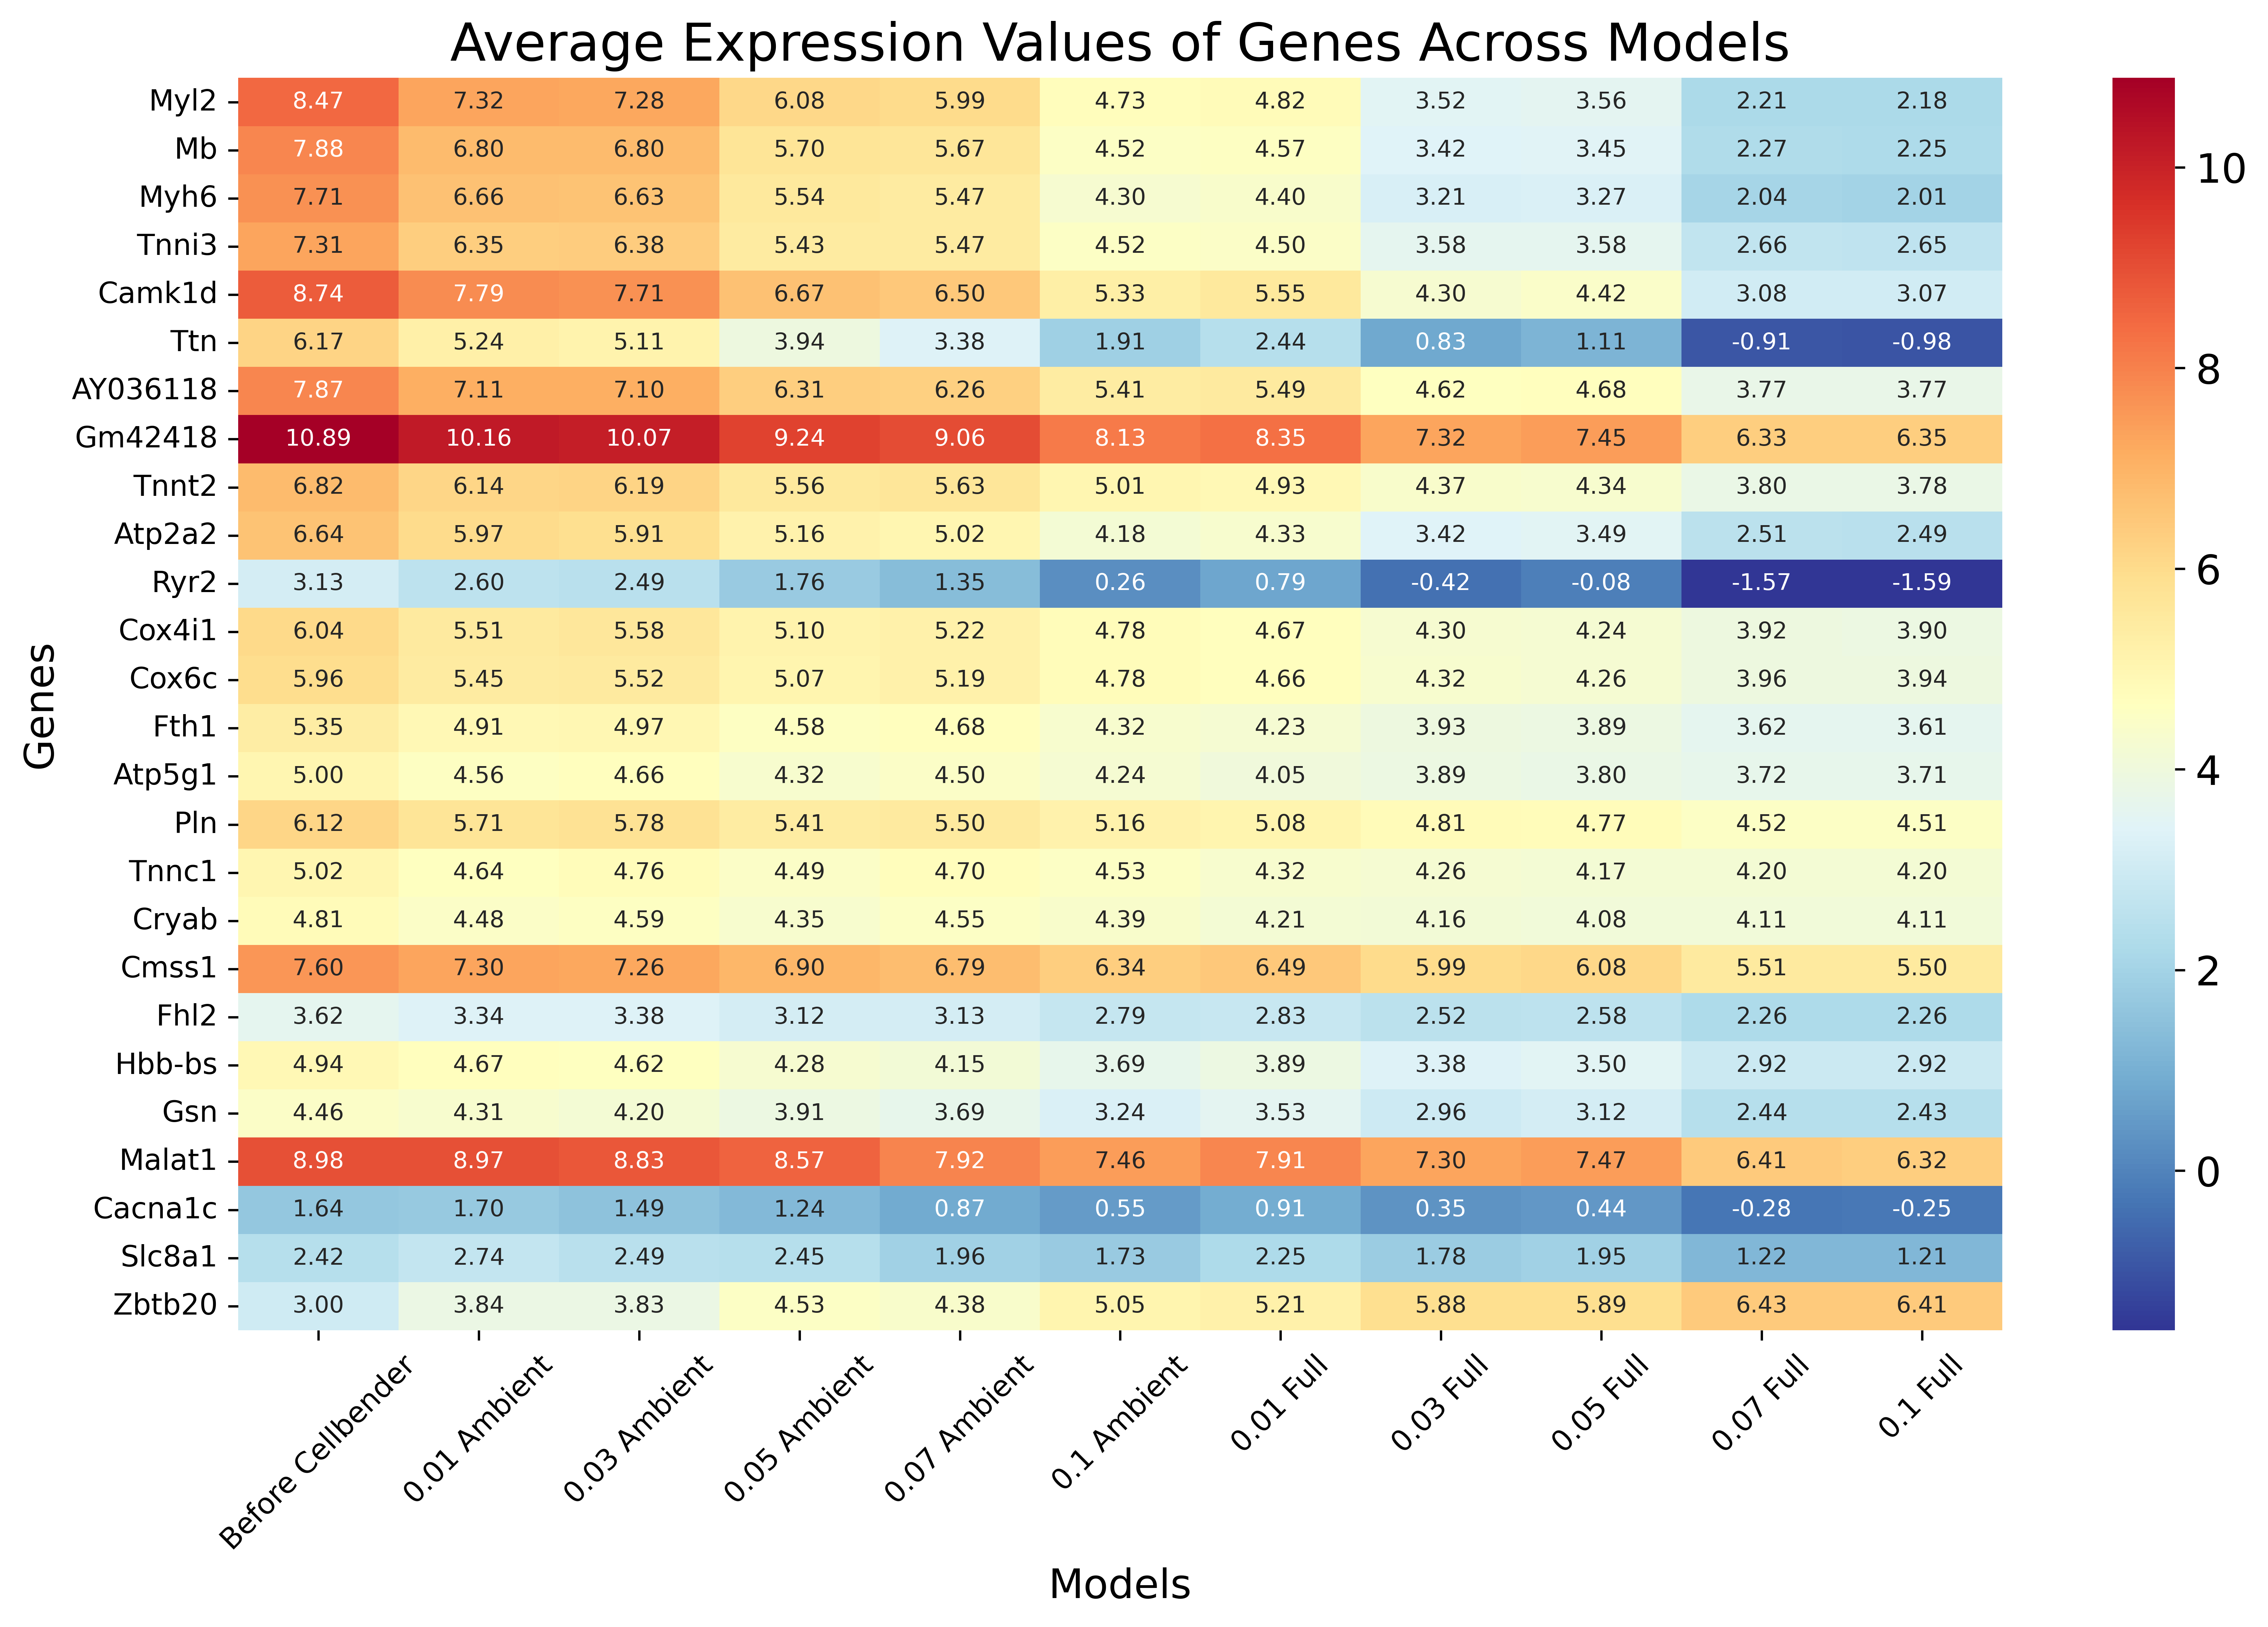

In [10]:
plt.figure(figsize=(12, 8))
ax = sns.heatmap(mean_df_transpose, annot=True, cmap='RdYlBu_r', fmt='.2f', annot_kws={"size": 8}, linewidths=0, linecolor='none')  
ax.grid(False)
plt.title('Average Expression Values of Genes Across Models', fontsize = 18)
plt.xlabel('Models')
plt.ylabel('Genes')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.tight_layout()
plt.show()

# Importing data - Log counts

In [11]:
count_data = {
    'Model': [
        'Before Cellbender', '0.01 Ambient', '0.03 Ambient', '0.05 Ambient', '0.07 Ambient', 
        '0.1 Ambient', '0.01 Full', '0.03 Full', '0.05 Full', '0.07 Full', '0.1 Full'
    ],
    'Malat1': [
        3133537.00, 1406996.00, 1282324.00, 1161940.00, 1031110.00, 
        937716.30, 1406217.00, 1278580.00, 1155424.00, 1029963.00, 928144.70
    ],
    'Gm42418': [
        3800596.00, 1593822.00, 1461942.00, 1351311.00, 1262621.00, 
        1165525.00, 1596089.00, 1462481.00, 1351466.00, 1260537.00, 1160316.00
    ],
    'Myl2': [
        2955189.00, 1147885.00, 1056413.00, 979079.10, 916917.40, 
        848168.20, 1144811.00, 1052418.00, 975148.90, 911560.40, 840515.50
    ],
    'Myh6': [
        2690386.00, 1043560.00, 962322.20, 892831.90, 836331.50, 
        771084.50, 1041030.00, 959695.10, 890450.90, 832611.70, 764903.90
    ],
    'Tnni3': [
        2552634.00, 996001.40, 926230.90, 866747.20, 818699.30, 
        763014.80, 993927.30, 923813.20, 864484.30, 814730.50, 757300.70
    ],
    'Tnnt2': [
        2379284.00, 961802.30, 898553.90, 844915.50, 799800.00, 
        746937.80, 959463.90, 896046.30, 842493.90, 796134.80, 741572.00
    ],
    'Mb': [
        2752351.00, 1067958.00, 987843.80, 919482.70, 863752.10, 
        799693.10, 1064612.00, 983615.20, 915050.10, 857945.40, 792228.70
    ],
    'Ttn': [
        2152959.00, 821867.20, 742141.70, 659550.90, 567199.80, 
        492782.10, 819404.60, 737817.10, 654521.00, 563850.00, 483563.40
    ],
    'AY036118': [
        2746080.00, 1114186.00, 1029837.00, 957159.30, 898171.60, 
        830976.10, 1112762.00, 1027000.00, 954337.40, 893612.70, 824303.90
    ],
    'Camk1d': [
        3051781.00, 1222623.00, 1120319.00, 1032943.00, 962236.50, 
        882600.60, 1221663.00, 1118138.00, 1030280.00, 957895.40, 875891.60
    ],
    'Cox4i1': [
        2107017.00, 864289.10, 809760.50, 763017.20, 725511.20, 
        681459.80, 860759.20, 805654.80, 758841.60, 720555.60, 675046.60
    ],
    'Cox6c': [
        2079059.00, 854431.20, 801082.40, 755662.70, 718578.70, 
        675200.00, 850863.20, 796966.00, 751575.50, 713663.00, 668142.60
    ],
    'Ryr2': [
        1091869.00, 407865.30, 361140.00, 309597.60, 254358.70, 
        194520.50, 401970.20, 354782.70, 305415.30, 251472.00, 191240.70
    ],
    'Atp2a2': [
        2316784.00, 935769.00, 857271.00, 789151.90, 734497.30, 
        674562.60, 932585.80, 853234.30, 784907.00, 729609.00, 668037.80
    ],
    'Tnnc1': [
        1752694.00, 728147.70, 691686.00, 660253.20, 633791.70, 
        603196.30, 727349.10, 689922.80, 658599.90, 631556.30, 598850.70
    ],
    'Slc8a1': [
        844912.80, 430474.00, 361426.70, 289145.10, 241355.50, 
        202352.20, 425351.00, 358995.30, 286780.00, 237573.10, 199638.80
    ],
    'Cacna1c': [
        573048.00, 266757.70, 210993.00, 160513.50, 130903.10, 
        113458.00, 263801.80, 209372.30, 158330.60, 129083.70, 112692.70
    ],
    'Pln': [
        2137073.00, 896107.90, 839103.00, 788892.20, 746767.50, 
        699443.00, 894545.80, 836993.90, 786720.70, 743531.70, 694526.30
    ],
    'Cmss1': [
        2653370.00, 1145548.00, 1054131.00, 975620.50, 911876.10, 
        839299.40, 1144292.00, 1052100.00, 973105.90, 907919.00, 832543.60
    ],
    'Gsn': [
        1556122.00, 675191.70, 609791.40, 549444.90, 504361.60, 
        451735.80, 673747.20, 606679.90, 547232.00, 501343.10, 447304.40
    ],
    'Zbtb20': [
        1046673.00, 601253.00, 556179.00, 499436.60, 453007.50, 
        419418.30, 600582.10, 554890.20, 497900.50, 451811.30, 417139.30
    ],
    'Atp5g1': [
        1746467.00, 716008.50, 677654.70, 645967.40, 619098.80, 
        587028.60, 713955.40, 675621.40, 643095.80, 615449.10, 582103.30
    ],
    'Hbb-bs': [
        1724776.00, 733228.40, 671111.80, 616451.80, 571440.50, 
        518556.90, 734187.30, 671595.00, 616286.00, 570717.70, 516861.50
    ],
    'Fhl2': [
        1263265.00, 523410.30, 490561.00, 460399.20, 431058.90, 
        392493.80, 519716.00, 486225.10, 456432.70, 428325.00, 390929.00
    ],
    'Fth1': [
        1384734.00, 563148.90, 528748.40, 498074.80, 470410.80, 
        437343.90, 560778.90, 525295.70, 495027.50, 466900.20, 433311.90
    ],
    'Cryab': [
        1602164.00, 677034.30, 641045.20, 606931.90, 577246.10, 
        539891.50, 674591.30, 638393.70, 604091.80, 574250.90, 535494.20
    ]
}

In [12]:
count_df = pd.DataFrame(count_data).set_index('Model')
count_df_transpose = count_df.T

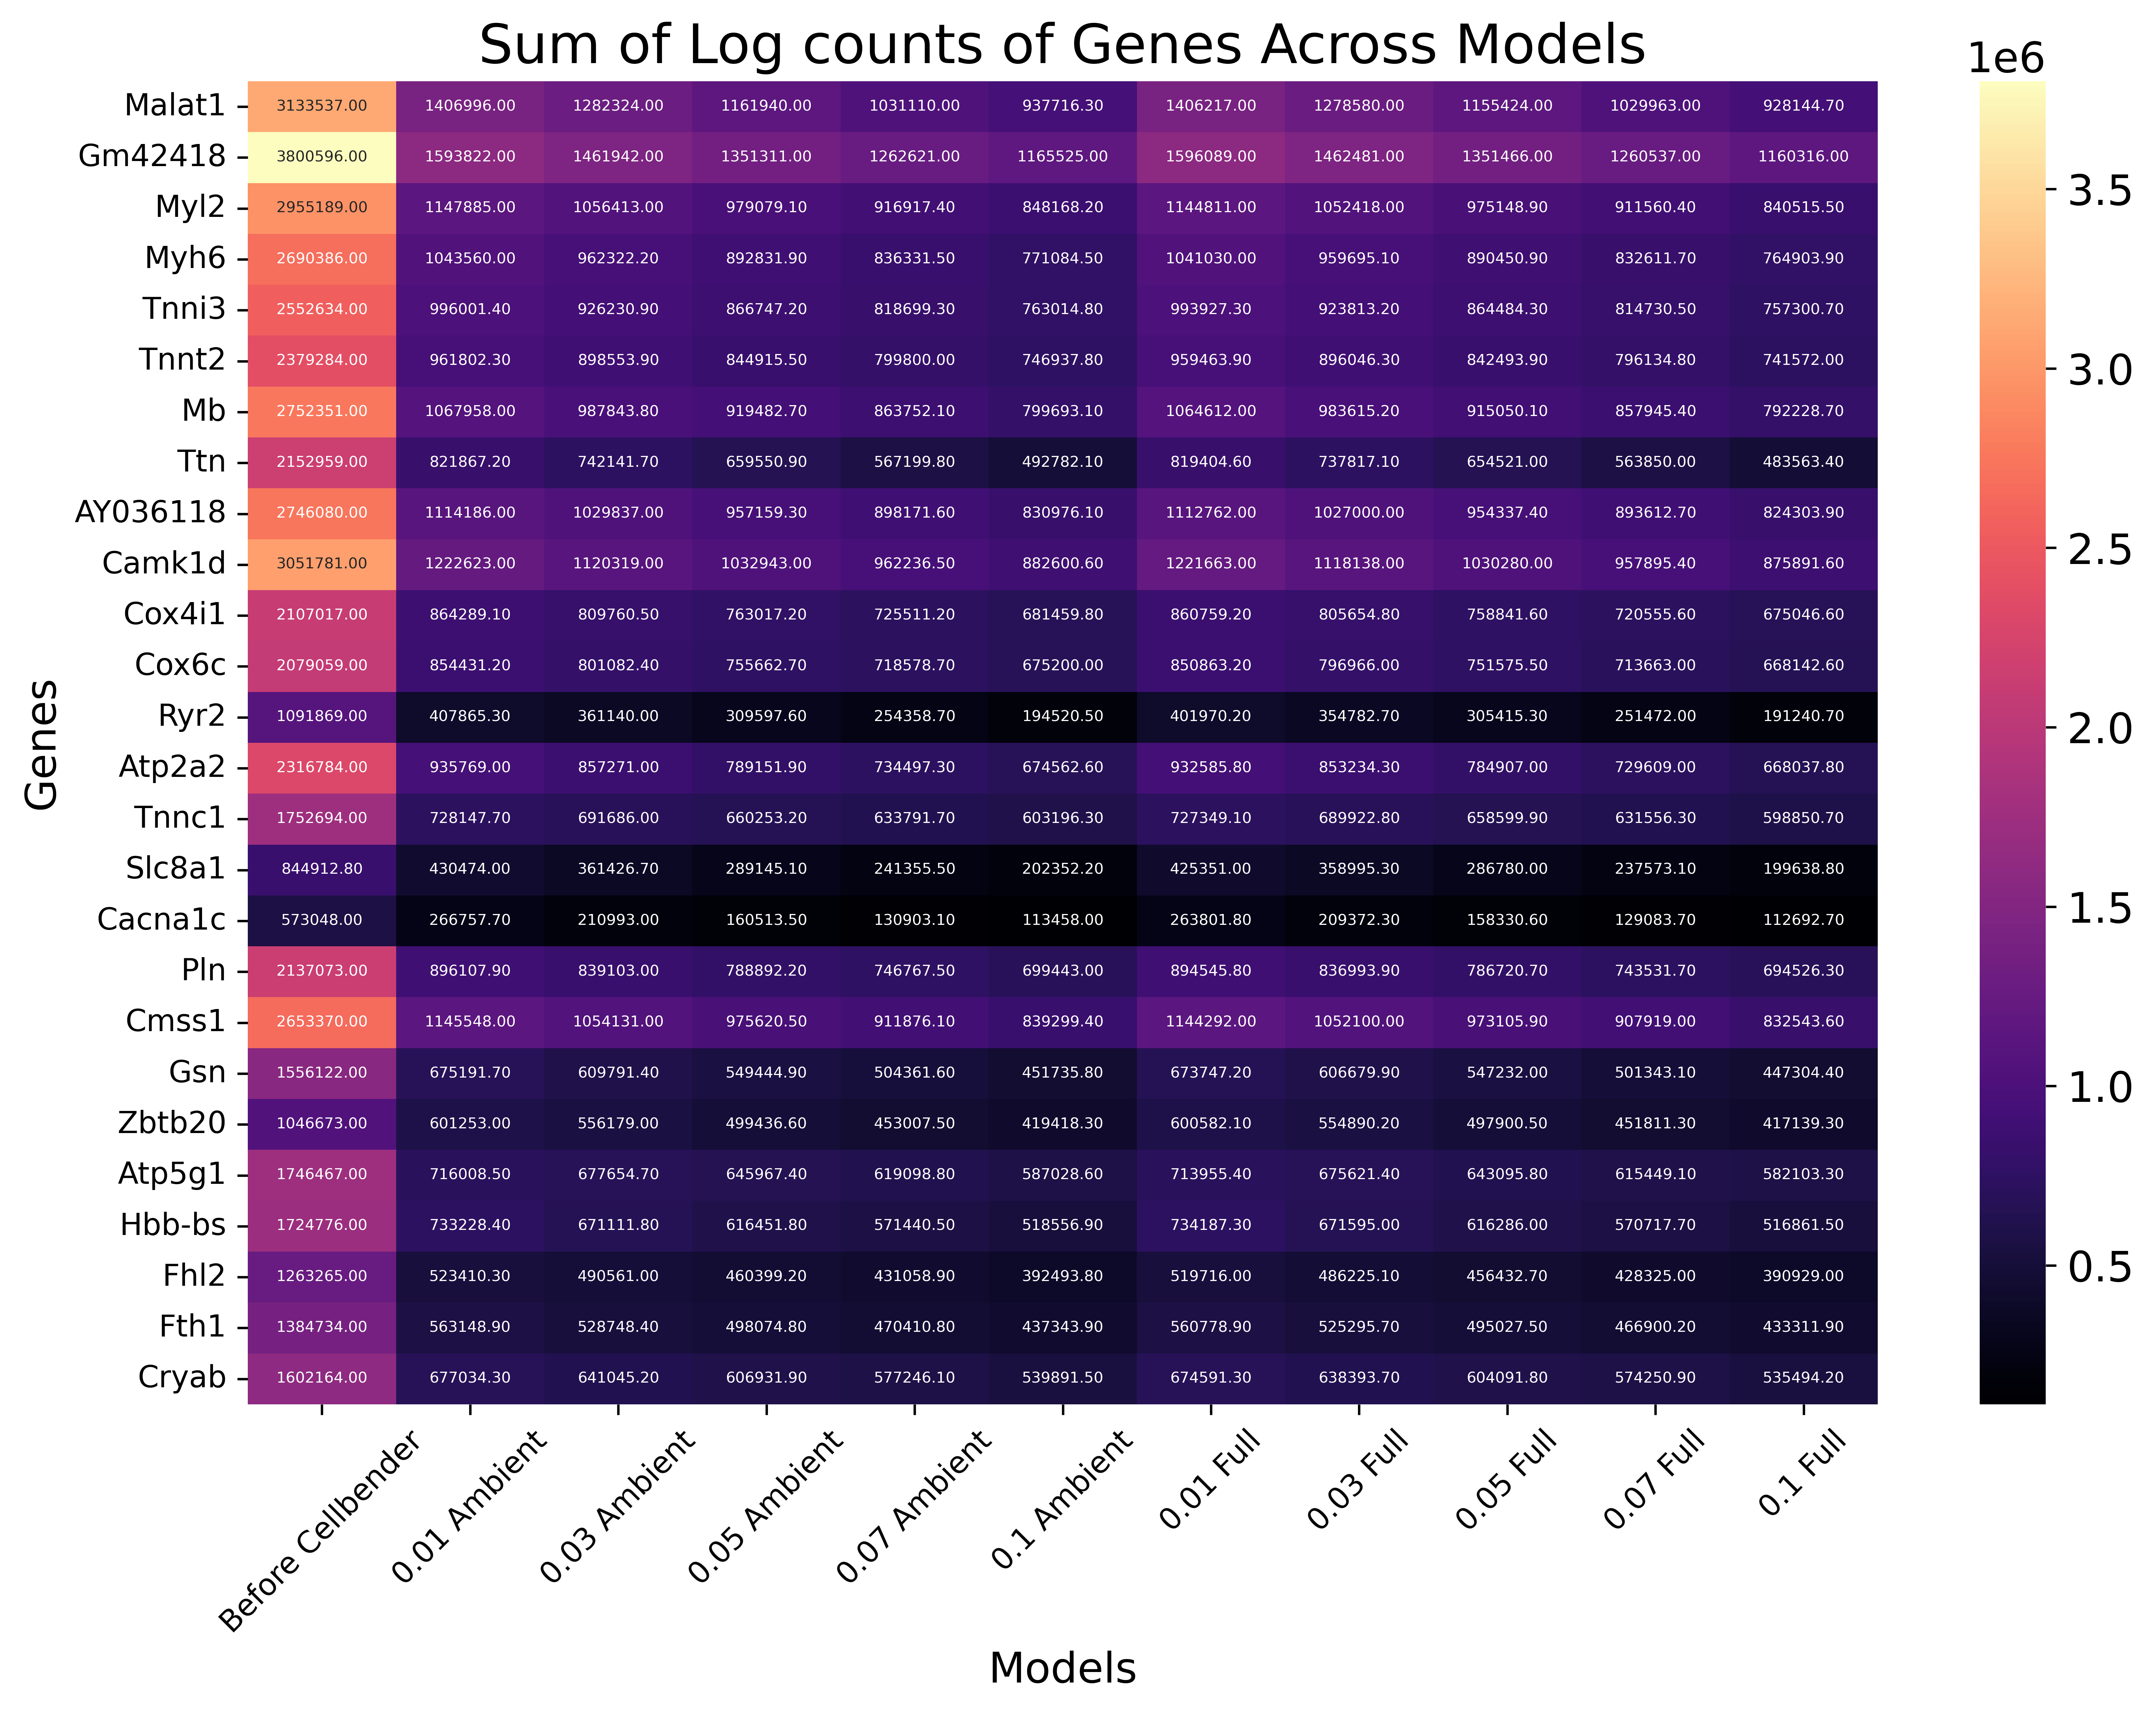

In [13]:
plt.figure(figsize=(12, 8))
ax = sns.heatmap(count_df_transpose, annot=True, cmap='magma', fmt='.2f', annot_kws={"size": 5}, linewidths=0, linecolor='none')  
ax.grid(False)
plt.title('Sum of Log counts of Genes Across Models', fontsize = 18)
plt.xlabel('Models')
plt.ylabel('Genes')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

# Importing data - Difference of Log counts

In [18]:
count_data_diff = {
    "Gene": [
        "Malat1", "Gm42418", "Myl2", "Myh6", "Tnni3", "Tnnt2", "Mb", "Ttn", "AY036118",
        "Camk1d", "Cox4i1", "Cox6c", "Ryr2", "Atp2a2", "Tnnc1", "Slc8a1", "Cacna1c", 
        "Pln", "Cmss1", "Gsn", "Zbtb20", "Atp5g1", "Hbb-bs", "Fhl2", "Fth1", "Cryab"
    ],
    "Before Cellbender": [
        3133537.00, 3800596.00, 2955189.00, 2690386.00, 2552634.00, 2379284.00, 
        2752351.00, 2152959.00, 2746080.00, 3051781.00, 2107017.00, 2079059.00, 
        1091869.00, 2316784.00, 1752694.00, 844912.80, 573048.00, 2137073.00, 
        2653370.00, 1556122.00, 1046673.00, 1746467.00, 1724776.00, 1263265.00, 
        1867721.00, 1678288.00
    ],
    "0.01 Ambient": [
        1726541.00, 2206774.00, 1807304.00, 1646826.00, 1556632.60, 1417481.70, 
        1684393.00, 1331091.80, 1631894.00, 1829158.00, 1242727.90, 1224627.80, 
        684003.70, 1381015.00, 1024546.30, 414438.80, 306290.30, 1242965.10, 
        1507822.00, 880930.30, 445420.00, 1030458.50, 991547.60, 739854.70, 
        1097263.40, 975978.40
    ],
    "0.03 Ambient": [
        1851213.00, 2338654.00, 1898776.00, 1728063.80, 1626403.10, 1480730.10, 
        1764507.20, 1410817.30, 1716243.00, 1931462.00, 1297256.50, 1277976.60, 
        730729.00, 1459513.00, 1061008.00, 483486.10, 362055.00, 1297970.00, 
        1599239.00, 946330.60, 490494.00, 1068812.30, 1053664.20, 772704.00, 
        1145805.60, 1012142.80
    ],
    "0.05 Ambient": [
        1971597.00, 2449285.00, 1976109.90, 1797554.10, 1685886.80, 1534368.50, 
        1832868.30, 1493408.10, 1788920.70, 2018838.00, 1343999.80, 1323396.30, 
        782271.40, 1527632.10, 1092440.80, 555767.70, 412534.50, 1348180.80, 
        1677749.50, 1006677.10, 547236.40, 1100499.60, 1108324.20, 802865.80, 
        1187344.40, 1043641.60
    ],
    "0.07 Ambient": [
        2102427.00, 2537975.00, 2038271.60, 1854054.50, 1733934.70, 1579484.00, 
        1888598.90, 1585759.20, 1847908.40, 2089544.50, 1381505.80, 1360480.30, 
        837510.30, 1582286.70, 1118902.30, 603557.30, 442144.90, 1390305.50, 
        1741493.90, 1051760.40, 593665.50, 1127368.20, 1153335.50, 832206.10, 
        1221445.90, 1069149.80
    ],
    "0.1 Ambient": [
        2195820.70, 2635071.00, 2107020.80, 1919301.50, 1789619.20, 1632346.20, 
        1952657.90, 1660176.90, 1915103.90, 2169180.40, 1425557.20, 1403859.00, 
        897348.50, 1642221.40, 1149497.70, 642560.60, 459590.00, 1437630.00, 
        1814070.60, 1104386.20, 627254.70, 1159438.40, 1206219.10, 870771.20, 
        1260968.60, 1100018.50
    ],
    "0.01 Full": [
        1727320.00, 2204507.00, 1810378.00, 1649356.00, 1558706.70, 1419820.10, 
        1687739.00, 1333554.40, 1633318.00, 1830118.00, 1246257.80, 1228195.80, 
        689898.80, 1384198.20, 1025344.90, 419561.80, 309246.20, 1242527.20, 
        1509078.00, 882374.80, 446090.90, 1032511.60, 990588.70, 743549.00, 
        1099635.90, 977722.40
    ],
    "0.03 Full": [
        1854957.00, 2338115.00, 1902771.00, 1730690.90, 1628820.80, 1483237.70, 
        1768735.80, 1415141.90, 1719080.00, 1933643.00, 1301362.20, 1282093.00, 
        737086.30, 1463549.70, 1062771.20, 485917.50, 363675.70, 1300079.10, 
        1601270.00, 949442.10, 491782.80, 1070845.60, 1053181.00, 777039.90, 
        1148735.40, 1014167.80
    ],
    "0.05 Full": [
        1978113.00, 2449130.00, 1980040.10, 1799935.10, 1688149.70, 1536790.10, 
        1837300.90, 1498438.00, 1791742.60, 2021501.00, 1348175.40, 1327483.50, 
        786453.70, 1531877.00, 1094094.10, 558132.80, 414717.40, 1350352.30, 
        1680264.10, 1008890.00, 548772.50, 1103371.20, 1108490.00, 806832.30, 
        1190237.60, 1045749.00
    ],
    "0.07 Full": [
        2103574.00, 2540059.00, 2043628.60, 1857774.30, 1737903.50, 1583149.20, 
        1894405.60, 1589109.00, 1852467.30, 2093885.60, 1386461.40, 1365396.00, 
        840397.00, 1587175.00, 1121137.40, 603836.80, 442766.90, 1395608.30, 
        1748683.60, 1054718.50, 594248.90, 1126169.60, 1153453.00, 834254.50, 
        1229283.50, 1070198.20
    ],
    "0.1 Full": [
        2199214.00, 2635129.00, 2112174.10, 1921858.30, 1793565.30, 1634576.80, 
        1955682.00, 1662854.00, 1918417.80, 2170635.40, 1435895.80, 1406533.80, 
        902368.60, 1643721.60, 1152813.40, 645614.80, 461049.60, 1439138.20, 
        1817454.80, 1106898.40, 628715.60, 1161248.90, 1207389.40, 875732.60, 
        1265890.20, 1100850.40
    ]
}

In [22]:
count_df_diff = pd.DataFrame(count_data_diff).set_index("Gene")
count_df_diff_transpose = count_df_diff.T

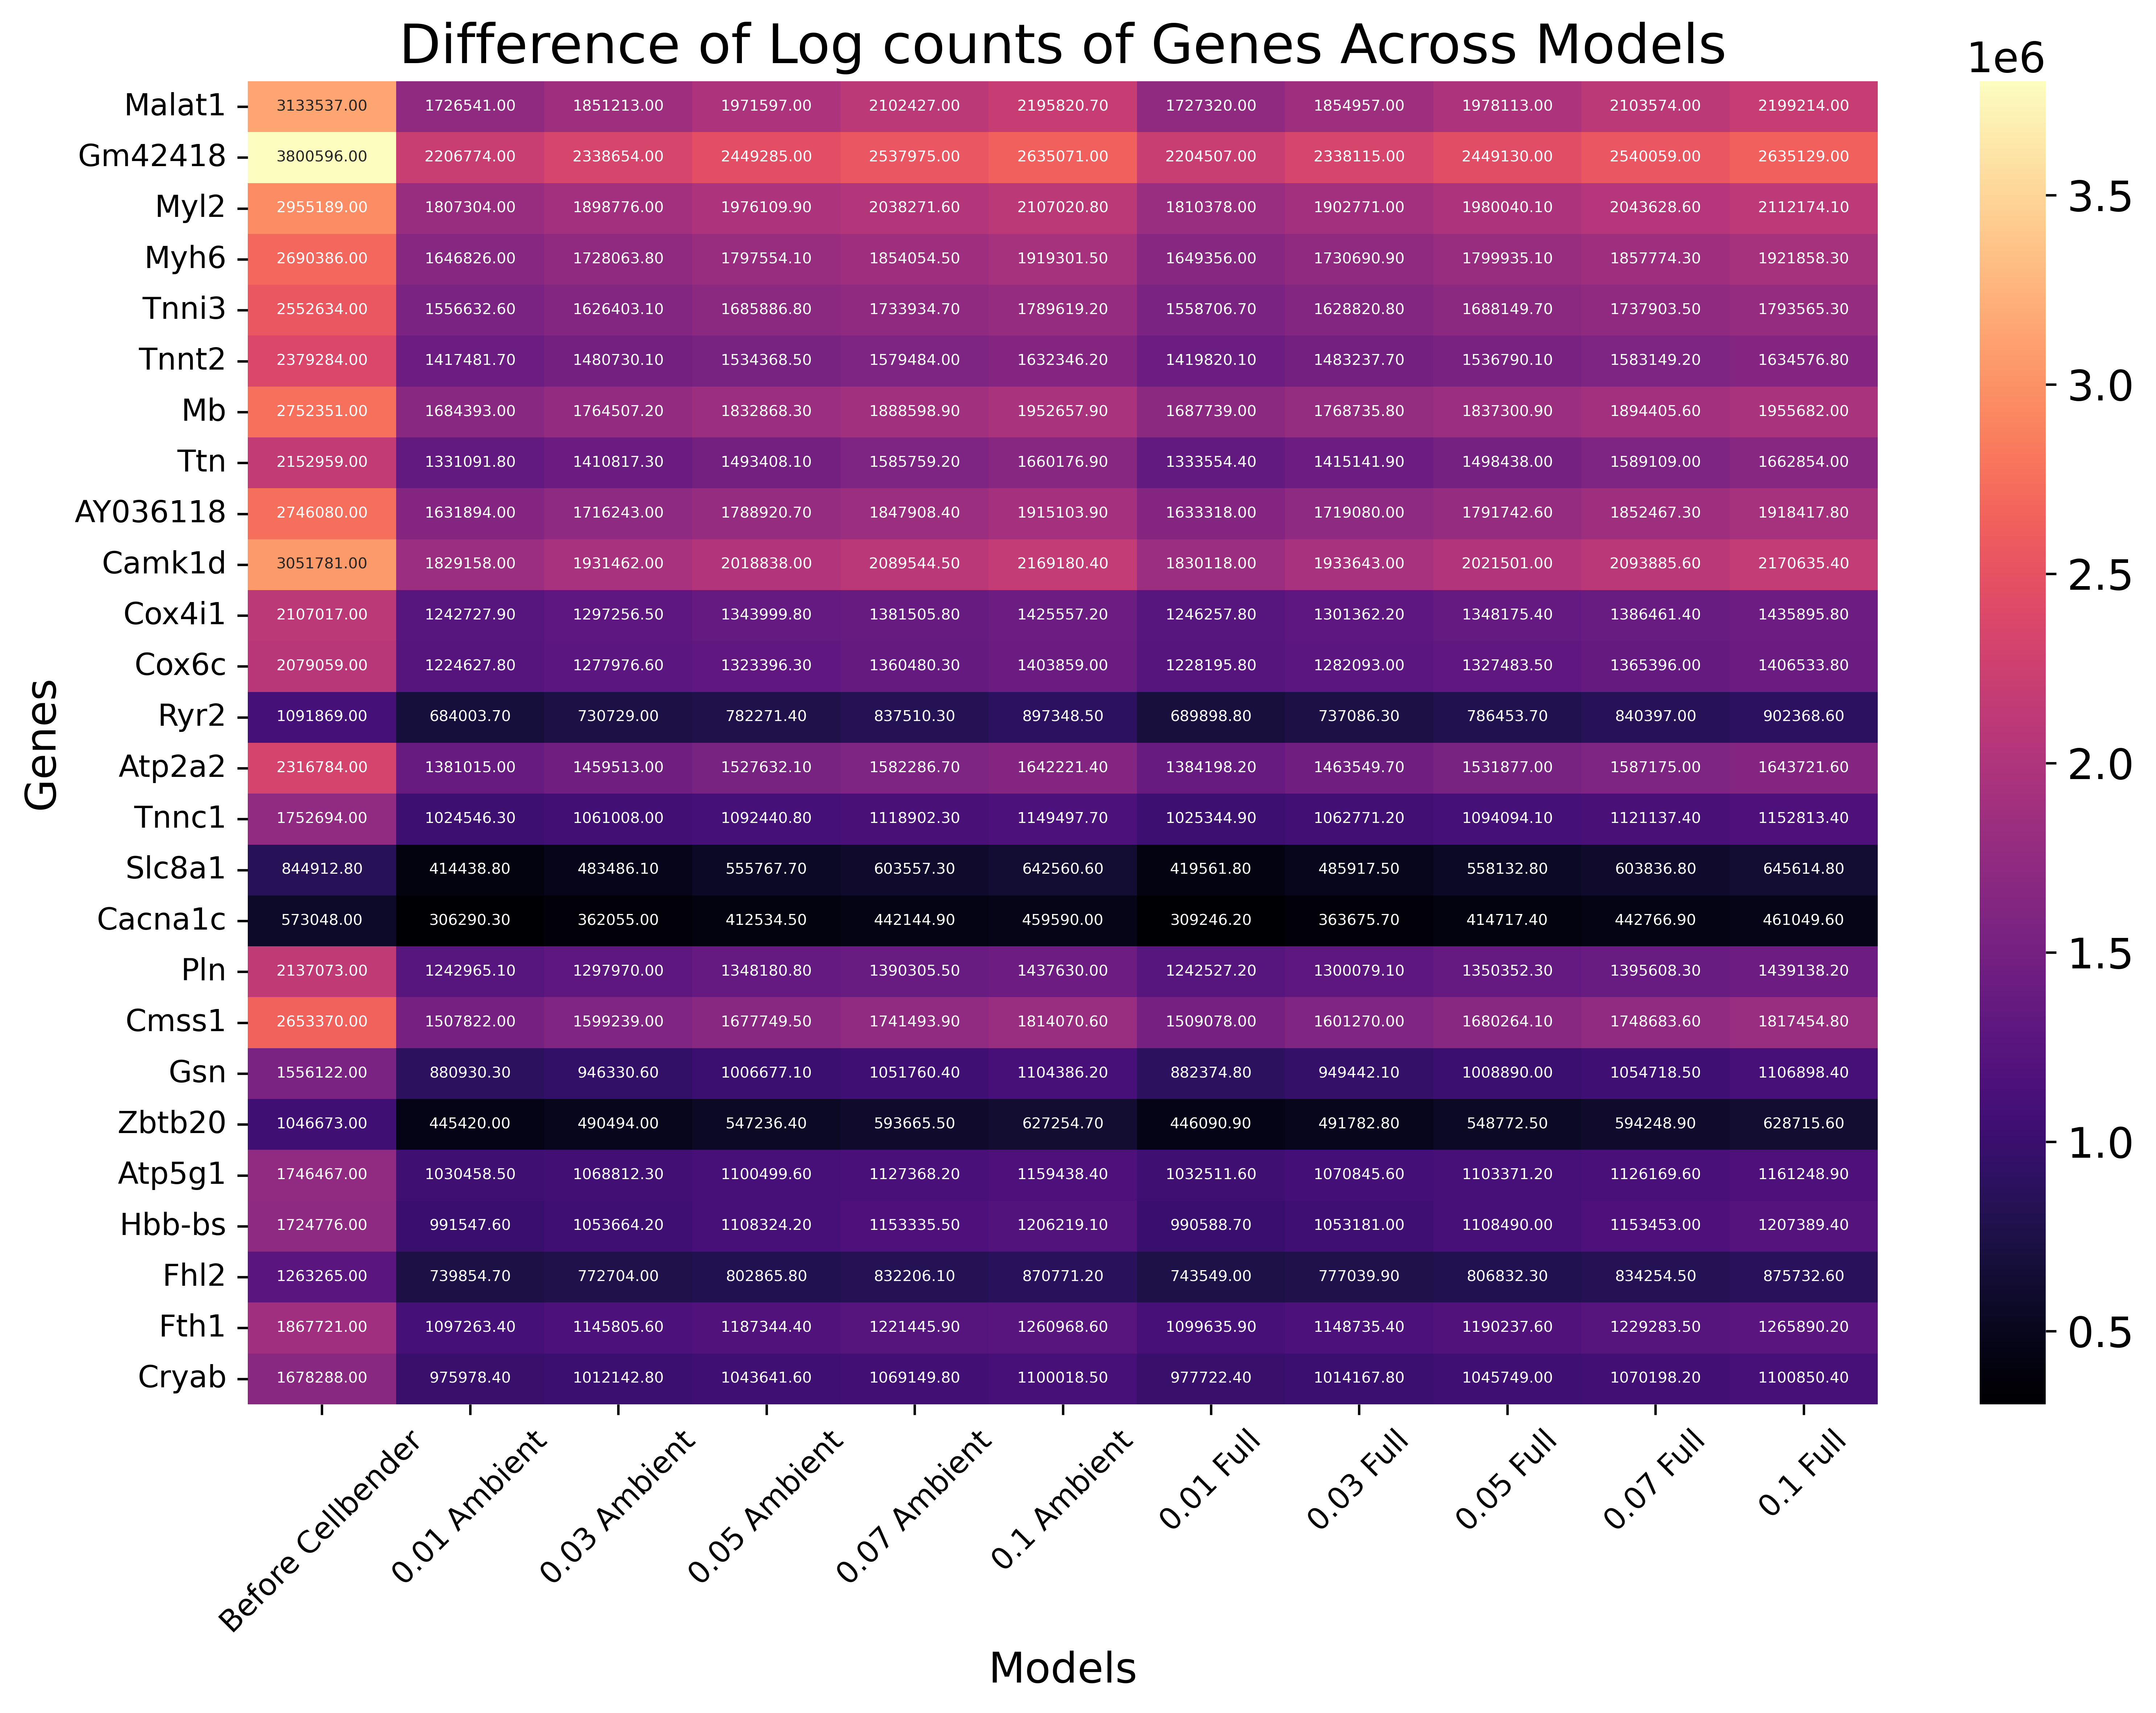

In [29]:
plt.figure(figsize=(12, 8))
ax = sns.heatmap(count_df_diff, annot=True, cmap="magma", fmt='.2f', annot_kws={"size": 5}, linewidths=0, linecolor='none')  
ax.grid(False)
plt.title('Difference of Log counts of Genes Across Models', fontsize = 18)
plt.xlabel('Models')
plt.ylabel('Genes')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()